# Accessing WorldPop API for beginners

In [1]:
import requests
import pandas as pd
import json
import tifffile as tf
import imagecodecs
pd.set_option('display.max_colwidth', None)

# Define request fun
def get_api(url, record_path = "data"):
  response = requests.get(url)
  # Check if the request was successful (status code 200)
  if response.status_code == 200:
    data = response.json()  # If the response is in JSON format
    data = pd.json_normalize(data, record_path, max_level=1)
  else:
    print("Error:", response.status_code)
  return(data)

## Basic API calls
The [WorldPop REST API](https://www.worldpop.org/sdi/introapi/) facilitates the querying of the WorldPop database to GET information on data held on the database, along with accompanying metadata associated with the data.

### Get WorldPop available datasets

In [75]:
base_url = "https://www.worldpop.org/rest/data"
data = get_api(base_url)
data

,alias,name,title,desc
0,pop,Population Counts,Population Counts,<b>WorldPop produces different types of gridde...
1,births,Births,Births,The health and survival of women and their new...
2,pregnancies,Pregnancies,Pregnancies,The health and survival of women and their new...
3,urban_change,Urban change,Urban change,East–Southeast Asia is currently one of the fa...
4,age_structures,Age and sex structures,Age and sex structures,<b>WorldPop produces different types of gridde...
5,dahi,Development Indicators,Development and Health Indicators,Improved understanding of geographical variati...
6,dependency_ratios,Dependency Ratios,Dependency Ratios,The age group composition of populations varie...
7,internal_migration_f,Migration Flows,Migration Flows,Human mobility continues to increase in terms ...
8,dynamic_mapping,Dynamic Mapping,Dynamic Mapping,Knowing where people are is critical for accur...
9,global_flight_data,Global Flight Data,Global Flight Data,The expanding global air network provides rapi...


### Get data levels for a specific dataset

In [88]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
# Get API data
url = f"{base_url}/{dalias}"
data = get_api(url)
data

,alias,name
0,pic,Individual countries
1,pop_continent,Whole Continent
2,wpgp,Unconstrained individual countries 2000-2020 (...
3,wpgp1km,Unconstrained global mosaics 2000-2020 ( 1km r...
4,,WP00643
5,wpgpunadj,Unconstrained individual countries 2000-2020 U...
6,wpic1km,Unconstrained individual countries 2000-2020 ...
7,wpicuadj1km,Unconstrained individual countries 2000-2020 U...
8,cic2020_100m,Constrained Individual countries 2020 ( 100m r...
9,cic2020_UNadj_100m,Constrained Individual countries 2020 UN adjus...


### Get the Countries and Years

In [92]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
dlevel = "wpgp"
url = f"{base_url}/{dalias}/{dlevel}"
# Get API data
data = get_api(url)
data
# Filter for specific coutnry
print(sorted(set(data["iso3"])))
data[data["iso3"] == 'PHL']

{'ALB', 'POL', 'OMN', 'UZB', 'KOR', 'USA', 'URY', 'AFG', 'ASM', 'CMR', 'DOM', 'PRT', 'MEX', 'KHM', 'GMB', 'JAM', 'KEN', 'ARM', 'SWE', 'MAC', 'HND', 'QAT', 'AIA', 'TWN', 'BIH', 'LAO', 'MAR', 'BEL', 'NLD', 'DNK', 'PYF', 'CIV', 'VUT', 'SMR', 'TCA', 'PSE', 'TZA', 'SPM', 'BRB', 'TCD', 'MDV', 'SAU', 'FRO', 'MUS', 'PCN', 'NGA', 'CHN', 'RWA', 'SYC', 'AUT', 'FRA', 'HMD', 'SEN', 'BHS', 'BMU', 'ARG', 'SLE', 'ATA', 'SLV', 'SSD', 'TTO', 'HTI', 'GNB', 'ZMB', 'SDN', 'TLS', 'WLF', 'MLI', 'KOS', 'PAK', 'AND', 'COG', 'TGO', 'COK', 'MAF', 'NFK', 'VEN', 'LTU', 'MYS', 'THA', 'TJK', 'SGS', 'ESP', 'BGR', 'CPV', 'PNG', 'DMA', 'MWI', 'AUS', 'MNE', 'YEM', 'ATF', 'ROU', 'JEY', 'VGB', 'LKA', 'GEO', 'SUR', 'KGZ', 'JOR', 'KAZ', 'WSM', 'GIB', 'PHL', 'BOL', 'CYM', 'MSR', 'LBY', 'NOR', 'TKL', 'ESH', 'SHN', 'IMN', 'GHA', 'BGD', 'PAN', 'SVK', 'ETH', 'MNP', 'GUF', 'LCA', 'LBN', 'IND', 'BES', 'IRL', 'CUW', 'KNA', 'GIN', 'ARE', 'MTQ', 'PER', 'MDA', 'STP', 'GUM', 'ABW', 'MOZ', 'LIE', 'ITA', 'BRN', 'IRN', 'LSO', 'LUX', 'SOM'

,id,title,popyear,iso3
19,1344,The spatial distribution of population in 2000...,2000,PHL
268,1593,The spatial distribution of population in 2001...,2001,PHL
517,1842,The spatial distribution of population in 2002...,2002,PHL
766,2091,The spatial distribution of population in 2003...,2003,PHL
1015,2340,The spatial distribution of population in 2004...,2004,PHL
1264,2589,The spatial distribution of population in 2005...,2005,PHL
1513,2838,The spatial distribution of population in 2006...,2006,PHL
1762,3087,The spatial distribution of population in 2007...,2007,PHL
2011,3336,The spatial distribution of population in 2008...,2008,PHL
2252,3577,The spatial distribution of population in 2009...,2009,PHL


### Get the data for selected Country/Year

In [2]:
# Define API params
base_url = "https://www.worldpop.org/rest/data"
dalias = "pop"
dlevel = "wpgp"
country = "PHL" # iso3
url = f"{base_url}/{dalias}/{dlevel}?iso3={country}"
# Get data
data = get_api(url)
data
# Filter by year
data[data["popyear"] == '2020']

,id,title,desc,doi,date,popyear,citation,data_file,archive,public,...,category,gtype,continent,country,iso3,files,url_img,organisation,license,url_summary
20,6316,"The spatial distribution of population in 2020, Philippines","Estimated total number of people per grid-cell. The dataset is available to download in Geotiff format at a resolution of 3 arc (approximately 100m at the equator). The projection is Geographic Coordinate System, WGS84. The units are number of people per pixel. The mapping approach is Random Forest-based dasymetric redistribution.",10.5258/SOTON/WP00645,2018-11-01,2020,"WorldPop (www.worldpop.org - School of Geography and Environmental Science, University of Southampton; Department of Geography and Geosciences, University of Louisville; Departement de Geographie, Universite de Namur) and Center for International Earth Science Information Network (CIESIN), Columbia University (2018). Global High Resolution Population Denominators Project - Funded by The Bill and Melinda Gates Foundation (OPP1134076). https://dx.doi.org/10.5258/SOTON/WP00645",GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif,N,Y,...,Unconstrained individual countries 2000-2020 ( 100m resolution ),Population,Asia,Philippines,PHL,[https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif],https://hub.worldpop.org/tabs/gdata/img/6316/phl_ppp_wpgp_2020_Image.png,"WorldPop, University of Southampton, UK, hub.worldpop.org",https://hub.worldpop.org/data/licence.txt,https://hub.worldpop.org/geodata/summary?id=6316


# Ge the data and do something

In [134]:
# Download the file
data_2020 = data[data["popyear"] == '2020']
data_file = data_2020["files"].to_string(index=False)
data_file

'[https://data.worldpop.org/GIS/Population/Global_2000_2020/2020/PHL/phl_ppp_2020.tif]'

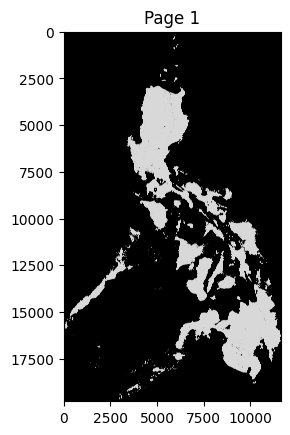

In [4]:
import tifffile as tiff

# Specify the path to your TIFF file
tiff_file_path = 'phl_ppp_2020.tif'

# Open the TIFF file
with tiff.TiffFile(tiff_file_path) as tif:
    # Check the number of pages (frames) in the TIFF file
    num_pages = len(tif.pages)

    # Access and process each page (frame) in the TIFF file
    for page_index in range(num_pages):
        page = tif.pages[page_index]
        
        # Get the image data as a NumPy array
        image_data = page.asarray()
        
        # Process the image_data as needed
        # For example, you can display the image using a library like matplotlib
        import matplotlib.pyplot as plt
        plt.imshow(image_data, cmap='gray')
        plt.title(f'Page {page_index + 1}')
        plt.show()


In [9]:
image_data

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

## Advance API calls

The (API)[https://www.worldpop.org/sdi/advancedapi/] allow you to request data WorldPop for a custom geographic area defined by a geojson. 

Currently contains two services which run on the servers: 'stats' and 'sample'. 'stats' is the primary service to return population totals. There are currently two datasets available in the API containing the total population from the WorldPop Global Project ('wpgppop') and the total population in age and sex categories ('wpgpas').

### Open a task 

In [64]:
# Define API params
base_url = "https://api.worldpop.org/v1/services"
service = "stats"
dataset = "wpgppop"
year = "2010"
# geo = json.load(open('phl_2017_poverty.geojson')) # Load custom geojson
geo = "{“type':'FeatureCollection','features':[{“type':'Feature','properties':{},'geometry':{“type':'Polygon','coordinates':[[[10.546875,47.62097541515849],[9.95361328125,46.437856895024204],[11.315917968749998,45.98169518512228],[12.63427734375,46.66451741754235],[12.65625,47.85740289465826],[10.546875,47.62097541515849]]]}}]}"
asyncro = "false" # Shoudl result be given straight away
url = f"{base_url}/{service}?dataset={dataset}&year={year}&geojson={geo}&runasync={asyncro}"
# Get data
data = get_api(url, record_path=None)
data

,status,status_code,error,error_message,taskid
0,finished,200,False,None,79a145a8-ef70-50a5-8728-c0f243ac06bf


### Monitor task status

In [65]:
# Define API params
task_url = "https://api.worldpop.org/v1/tasks"
task_id = data["taskid"].to_string(index=False)
task_url = f"{task_url}/{task_id}"
print(task_url)
# Get response
response = requests.get(task_url)
data_task = response.json()  # If the response is in JSON format
data_task

https://api.worldpop.org/v1/tasks/79a145a8-ef70-50a5-8728-c0f243ac06bf


{'status': 'finished',
 'error': True,
 'error_message': 'No User Description for this type of error: JSONDecodeError',
 'taskid': '79a145a8-ef70-50a5-8728-c0f243ac06bf',
 'startTime': '2023-08-26 11:12:53.251456',
 'endTime': '2023-08-26 11:12:54.25688',
 'executionTime': 1}